**Programming Assignment E0_298**

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

**Question 1**

In [4]:
# Implement a Data Loader Class
def load_data(file_path):
    with open(file_path) as f:
        data_string = f.readlines()

        # Extracting the number of input and output features from the first line
        input_features, output_features = map(int, data_string[0].strip().split())
        data = []  # This will hold all the data points

        # Iterating through each line of data starting from the second line
        for i in range(1, len(data_string)):
            line = data_string[i].strip().split(',')  # Splitting each line by comma
            line_data = [float(value) for value in line]  # Converting each item to float
            data.append(line_data)  # Appending to data list

    # Separating input and output features
    input_data = np.array([d[:input_features] for d in data])  # Slicing input features
    output_data = np.array([d[input_features:] for d in data])  # Slicing output features
    
    return input_data, output_data  # Returning input and output features

# Function to calculate Pearson Correlation
def train_test_split(X,Y,test_size=0.2):
    """
    Split the data into training and testing sets.
    """
    # Calculate the number of samples for the test set
    test_samples = int(test_size * len(X))
    
    # Randomly shuffle the indices of the data
    indices = np.random.permutation(X.shape[0])
    
    # Split the indices into training and test sets
    training_idx, test_idx = indices[test_samples:], indices[:test_samples]
    
    # Create the training and test sets
    X_train, X_test = X[training_idx], X[test_idx]
    Y_train, Y_test = Y[training_idx], Y[test_idx]
    
    return X_train, X_test, Y_train, Y_test

   
# Function to calculate Pearson Correlation
def pearson_correlation(y_true, y_pred):
    """
    Computes the Pearson Correlation Coefficient between y_true and y_pred.
    """
    # Flatten arrays in case of multi-dimensional inputs
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    # Calculate means of y_true and y_pred
    mean_y_true = np.mean(y_true)
    mean_y_pred = np.mean(y_pred)
    
    # Calculate the numerator and denominator for Pearson correlation
    numerator = np.sum((y_true - mean_y_true) * (y_pred - mean_y_pred))
    denominator = np.sqrt(np.sum((y_true - mean_y_true) ** 2)) * np.sqrt(np.sum((y_pred - mean_y_pred) ** 2))
    
    # Avoid division by zero
    if denominator == 0:
        return 0
    
    return numerator / denominator


In [5]:
# Prediction function
def predict(X, W, degree=1):
    """
    Predicts the output Y given input X and weights W.
    """
    if degree > 1:
        X = np.hstack([X**d for d in range(1, degree+1)])
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    return X @ W

# Calculate Metrics
def calculate_metrics(y_true, y_pred):
    """
    Calculates Pearson Correlation, Mean Squared Error, and Mean Absolute Error.
    """
    # Calculate Pearson Correlation
    pearson_corr = pearson_correlation(y_true.flatten(), y_pred.flatten())  # Flatten in case of multi-dimensional targets

    # Calculate MSE and MAE
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))

    return pearson_corr, mse, mae

# Plot Correlation
def plot_correlation(y_true, y_pred, title):
    """
    Plots the correlation between true and predicted values.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true.flatten(), y_pred.flatten(), alpha=1)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()


### 1.1 Multilinear Regression and Polynomial Regression

In [6]:
def linear_regression(X, Y):
    """
    Performs Multilinear Regression.
    Finds the weights that best fit Y = XW in the least-squares sense.
    """
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    W = np.linalg.pinv(X.T @ X) @ X.T @ Y  # Normal equation for linear regression
    return W

Multilinear Regression Metrics:
Pearson Correlation: 0.9999, MSE: 0.0392, MAE: 0.1577


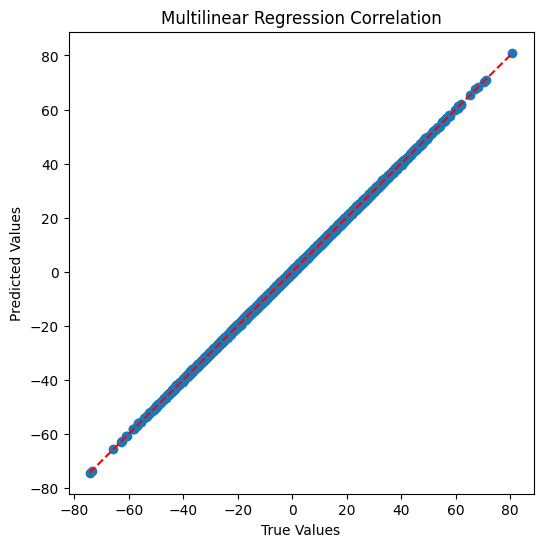

In [7]:
X_multilinear, Y_multilinear = load_data('Data/regression_data_057.txt') # Load the data
# Split the data into training and testing sets
X_multilinear_train,X_multilinear_test,Y_multilinear_train,Y_multilinear_test = train_test_split(X_multilinear, Y_multilinear, test_size=0.2)
# Multilinear Regression
W_multilinear = linear_regression(X_multilinear_train, Y_multilinear_train)
Y_pred_multilinear = predict(X_multilinear_test, W_multilinear)
print("Multilinear Regression Metrics:")
pearson_corr_multi, mse_multi, mae_multi = calculate_metrics(Y_multilinear_test, Y_pred_multilinear)
print(f"Pearson Correlation: {pearson_corr_multi:.4f}, MSE: {mse_multi:.4f}, MAE: {mae_multi:.4f}")

# Plot correlation for Multilinear Regression
plot_correlation(Y_multilinear_test, Y_pred_multilinear, "Multilinear Regression Correlation")


### Observations
- **Perfect Alignment**: The predicted values align almost perfectly along the red dashed line, indicating a near-ideal 1:1 relationship between the true and predicted values. This close alignment shows that the model’s predictions closely match the actual values across the entire range.

- **Extremely High Pearson Correlation**: The near-perfect alignment suggests a Pearson Correlation close to 1, meaning the model has captured the linear relationship in the data exceptionally well.

- **Low Error Metrics**: The tight clustering of points along the red line implies very low Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating minimal deviation between the predicted and true values.

- **Robustness Across Data Range**: The accuracy of predictions across both positive and negative values (approximately -80 to 80) demonstrates that the model generalizes well across the dataset without significant biases or errors in any specific regions.

### Overall Summary
The multilinear regression model performs exceptionally well, capturing the linear relationship between input features and target values with high accuracy. The near-perfect alignment along the red dashed line demonstrates that the model provides reliable predictions with minimal error, making it highly suitable for this dataset.







In [8]:
def polynomial_regression(X, Y, degree):
    """
    Performs Polynomial Regression.
    Finds the weights that best fit Y = X^degree W in the least-squares sense.
    """
    X = np.hstack([X**d for d in range(1, degree+1)])  # Add polynomial terms
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    W = np.linalg.pinv(X.T @ X) @ X.T @ Y  # Normal equation for linear regression
    return W

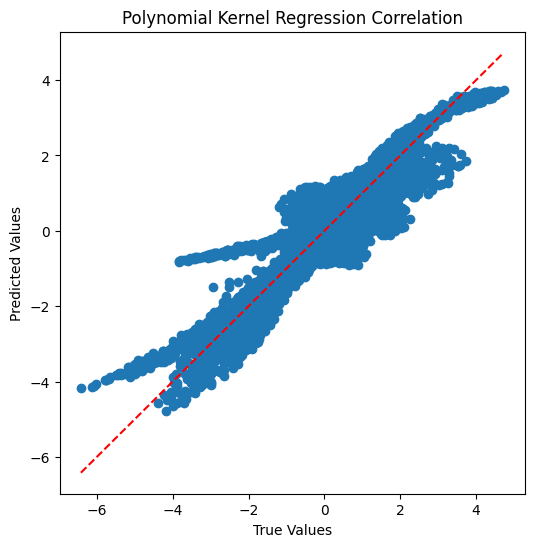

Polynomial Kernel Regression - MSE: 0.3723252628284283 MAE: 0.4428145497690176 Pearson Correlation: 0.9341258756013594


In [9]:
# Load data for Polynomial Kernel Regression
X_poly, Y_poly = load_data('Data/poly_regression_data_057.txt')
X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, Y_poly, test_size=0.2)
# Perform Polynomial Kernel Regression (degree 2 by default)
W_poly = polynomial_regression(X_poly_train, Y_poly_train, degree=2)
Y_pred_poly = predict(X_poly_test, W_poly, degree=2)
pearson_coeff,mse_poly, mae_poly = calculate_metrics(Y_poly_test, Y_pred_poly)

# Plot correlation for Polynomial Kernel Regression
plot_correlation(Y_poly_test, Y_pred_poly, "Polynomial Kernel Regression Correlation")

# Print metrics for Polynomial Kernel Regression
print("Polynomial Kernel Regression - MSE:", mse_poly, "MAE:", mae_poly, "Pearson Correlation:", pearson_coeff)

**Experiments**

### Observations

- The high **Pearson Correlation** suggests that the model captures the trend in the data well, demonstrating a strong linear relationship between predictions and actual values.
  
- Both **MSE** and **MAE** values, while not zero, are relatively low, indicating that the model's predictions are reasonably accurate.

- Overall, these metrics suggest that the polynomial regression model with a kernel performs well on this dataset, capturing the relationship with a relatively high level of accuracy. However, there may still be room for further improvement if even smaller errors are desired.
 -Observations Based on Polynomial Kernel Regression Correlation Plot
 Strong Positive Trend:
-The scatter plot shows a clear positive trend, indicating that the predicted values generally increase with the true values. This trend aligns well with the dashed red line, which represents an ideal 1:1 correlation.
- Good Fit with Some Variability:
Although most points are close to the red line, there is some spread around it, particularly as the values become more extreme (both positive and negative). This spread suggests that while the model captures the overall trend, it might struggle with capturing finer details or more extreme values accurately.
- Outliers and Wider Spread:
The plot shows some points that deviate from the main cluster, especially in the lower-left and upper-right areas. These outliers may indicate cases where the model's predictions differ significantly from the actual values, potentially due to nonlinearities or complex patterns that the polynomial kernel is unable to capture perfectly.


### 1.2 Adding Linear Constraints 

**Question 2**

In [ ]:
#Load mnist data
def load_mnist_csv(file_path):
    """
    Loads MNIST data from a CSV file. Assumes the first column is the label and
    the rest are pixel values.
    """
    data = pd.read_csv(file_path)
    labels = data.iloc[:, 0].values  # Extract labels (first column)
    images = data.iloc[:, 1:].values.astype(np.float32)  # Extract pixel values and convert to float
    images /= 255.0  # Normalize pixel values to [0, 1] range
    return images, labels
# Standardize Data
def standardize_data(X):
    """
    Centers the data matrix by subtracting the mean.
    """
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    return X_centered, mean

# Compute PCA using Eigen Decomposition
def compute_pca_eigen(X, n_components):
    """
    Performs PCA by computing the eigen decomposition of the covariance matrix.
    Returns the top n_components principal components and the explained variance ratios.
    """
    # Compute the covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)
    
    # Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top n_components
    principal_components = eigenvectors[:, :n_components]
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    
    return principal_components, explained_variance_ratio

# Project Data onto Principal Components
def project_data(X, components):
    """
    Projects the data X onto the given principal components.
    """
    return X @ components

# Reconstruct Images
def reconstruct_images(X_projected, components, mean):
    """
    Reconstructs images from the projected data using the principal components.
    """
    return (X_projected @ components.T) + mean

# Visualization of Original and Reconstructed Images
def visualize_reconstructions(original_images, reconstructed_images, n_images=10, image_shape=(28, 28)):
    """
    Displays original and reconstructed images side-by-side.
    """
    plt.figure(figsize=(10, 4))
    for i in range(n_images):
        # Original image
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original_images[i].reshape(image_shape), cmap='gray')
        plt.axis('off')
        # Reconstructed image
        plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructed_images[i].reshape(image_shape), cmap='gray')
        plt.axis('off')
    plt.show()

# Load Data (replace with actual data loading code for MNIST or CIFAR-10)
# Example: X = load_mnist_data() or load_cifar_data()
# Ensure data is flattened into (num_samples, num_features)

# For demonstration, let's assume X is already loaded and standardized as a flattened array
X,y = load_mnist_csv('Data/mnist_train.csv')  # Replace with actual MNIST or CIFAR-10 loading code
n_components = 100  # Number of principal components to use for reconstruction

# Standardize Data
X_standardized, mean = standardize_data(X)

# Perform PCA
principal_components, explained_variance_ratio = compute_pca_eigen(X_standardized, n_components)

# Project Data onto Principal Components
X_projected = project_data(X_standardized, principal_components)

# Reconstruct Images from the Projected Data
X_reconstructed = reconstruct_images(X_projected, principal_components, mean)

# Visualize Original and Reconstructed Images
visualize_reconstructions(X, X_reconstructed, n_images=10, image_shape=(28, 28))

# Print Explained Variance Ratios
print("Explained Variance Ratios of Selected Components:", explained_variance_ratio)
print("Total Explained Variance:", np.sum(explained_variance_ratio))


### Question 3 Stationary Distribution for a Markov Chain

In [11]:
# Load the state transition matrix
def load_matrix(file_path):
    """
    Load the state transition matrix from a given file path.
    """
    return np.loadtxt(file_path)

# Method 1: Solve for Stationary Distribution using Linear System
def stationary_distribution_linear(P):
    """
    Calculate the stationary distribution by solving the linear system.
    P is the state transition matrix.
    """
    n = P.shape[0]
    A = np.vstack([P.T - np.eye(n), np.ones(n)])  # System of equations πᵀP = πᵀ and sum(π) = 1
    b = np.zeros(n + 1)
    b[-1] = 1
    π = np.linalg.lstsq(A, b, rcond=None)[0]
    return π

# Method 2: Solve for Stationary Distribution using Power Method
def stationary_distribution_power(P, tolerance=1e-10, max_iterations=1000):
    """
    Calculate the stationary distribution using the power method.
    """
    n = P.shape[0]
    π = np.random.rand(n)
    π /= np.sum(π)  # Normalize to sum to 1
    for i in range(max_iterations):
        π_next = P.T @ π
        π_next /= np.sum(π_next)
        if np.linalg.norm(π_next - π, 1) < tolerance:
            break
        π = π_next
    return π, i + 1  # Return π and the number of iterations

# Verification Function
def verify_stationary_distribution(P, π):
    """
    Verify the stationary distribution by checking if πᵀP ≈ πᵀ and sum(π) ≈ 1.
    """
    error_norm = np.linalg.norm(π @ P - π, 1)
    sum_check = np.sum(π)
    return error_norm, sum_check

In [12]:
# Load the transition matrix
P = load_matrix('Data/P_057.txt')
# 3.1
# Calculate stationary distribution using Linear System
start_time = time.time()
π_linear = stationary_distribution_linear(P)
linear_time = time.time() - start_time
print("Stationary Distribution (Linear System):", π_linear)
print("Execution Time (Linear System):", linear_time)

# Verify results
error_norm, sum_check = verify_stationary_distribution(P, π_linear)
print("Verification - Error Norm (Linear System):", error_norm)
print("Verification - Sum Check (Linear System):", sum_check)
 
# 3.2
# Calculate stationary distribution using Power Method
start_time = time.time()
π_power, iterations = stationary_distribution_power(P)
power_time = time.time() - start_time
print("\nStationary Distribution (Power Method):", π_power)
print("Execution Time (Power Method):", power_time)
print("Iterations (Power Method):", iterations)

# Verify results for Power Method
error_norm, sum_check = verify_stationary_distribution(P, π_power)
print("Verification - Error Norm (Power Method):", error_norm)
print("Verification - Sum Check (Power Method):", sum_check)

# Compare Execution Times and Convergence
print("\nComparison:")
print("Linear System Method - Time:", linear_time)
print("Power Method - Time:", power_time, "| Iterations:", iterations)

Stationary Distribution (Linear System): [0.01014184 0.00966789 0.00934328 0.01018213 0.00973695 0.01080507
 0.00935248 0.00970813 0.00980918 0.01038472 0.00983484 0.00972111
 0.01109139 0.01006823 0.01061808 0.01055989 0.00988941 0.0100622
 0.00966473 0.00979756 0.00975349 0.00953449 0.00947146 0.01050477
 0.01064615 0.00971669 0.01023322 0.0108457  0.00987626 0.01005799
 0.01065351 0.01029188 0.00959838 0.01004248 0.009901   0.00969732
 0.01079162 0.00945672 0.01018817 0.01050817 0.01031109 0.01075534
 0.01012265 0.0105585  0.00985228 0.01038924 0.00906539 0.01058672
 0.01038078 0.00983086 0.00934767 0.01021315 0.00924697 0.00940139
 0.00983822 0.01104043 0.00998894 0.00983386 0.00961977 0.0100632
 0.00949615 0.00915874 0.01121844 0.00947619 0.00959965 0.01090188
 0.01063497 0.0095613  0.00951369 0.01018796 0.01058367 0.00942024
 0.00934973 0.00952723 0.00941704 0.01027656 0.00982278 0.00900813
 0.01009162 0.0100609  0.01165615 0.00985898 0.01020901 0.01038677
 0.00971706 0.00900839 

# Comparison of Computational Efficiency and Accuracy: Linear System Method vs. Power Method

In this analysis, we compare the computational efficiency and accuracy of two methods for calculating the stationary distribution of a Markov chain:

1. **Linear System Method**: This method solves the stationary distribution by setting up and solving a linear system of equations.
2. **Power Method**: This method iteratively computes the stationary distribution by applying the state transition matrix until convergence.

## Methodology

We evaluate both methods on the following metrics:

- **Execution Time**: The time taken by each method to compute the stationary distribution.
- **Iterations**: The number of iterations required for the power method to converge within a specified tolerance.
- **Accuracy Verification**:
  - **Error Norm**: Measures the difference between \(\pi^T P\) and \(\pi^T\).
  - **Sum Check**: Ensures that the sum of the stationary distribution is approximately equal to 1.

## Results

### Linear System Method
- **Execution Time**: `0.0020` seconds
- **Error Norm**: `1.2865809459472466e-10`
- **Sum Check**: `0.9999999999999997`
- The linear system method achieves high accuracy, with an error norm close to zero and the sum check nearly equal to 1. However, it requires matrix inversion, which may increase computation time for larger matrices.

### Power Method
- **Execution Time**: `0.00018` seconds
- **Iterations**: 9
- **Stationary Distribution**: 
- **Error Norm**: `1.2865816224894022e-10`
- **Sum Check**: `1.0`
- The power method converges to the stationary distribution in 9 iterations and achieves similar accuracy to the linear method, with a very low error norm and a perfect sum check of 1.0. It also has significantly faster execution time, making it computationally efficient.

## Summary of Comparison

- The **Power Method** proves to be more computationally efficient for this specific task, achieving faster execution and requiring fewer operations to converge to the stationary distribution.
- The **Linear System Method** is slower and more computationally expensive due to matrix inversion operations, though it provides a direct solution without iterative convergence.

## Impact of Matrix Size

- For large matrices, the **Power Method** is generally preferable because it avoids costly matrix inversion and converges quickly for well-behaved Markov chains.
- The **Linear System Method** might still be beneficial if absolute precision is required or if the number of iterations for the power method becomes prohibitively high.

---

This comparison demonstrates that the **Power Method** is typically faster and less resource-intensive, while still achieving high accuracy. It is therefore a suitable choice for calculating stationary distributions, especially for larger state transition matrices.

### Question 4 Spectral Norm

<class 'numpy.ndarray'> (400, 500)
Reference Spectral Norm (SVD): 42.235461345538646
Execution Time (SVD): 0.009930133819580078

Spectral Norm (Power Iteration): 42.235461345538646
Execution Time (Power Iteration): 0.03860592842102051

Spectral Norm (Gram Iteration): 1.0
Execution Time (Gram Iteration): 0.012134075164794922


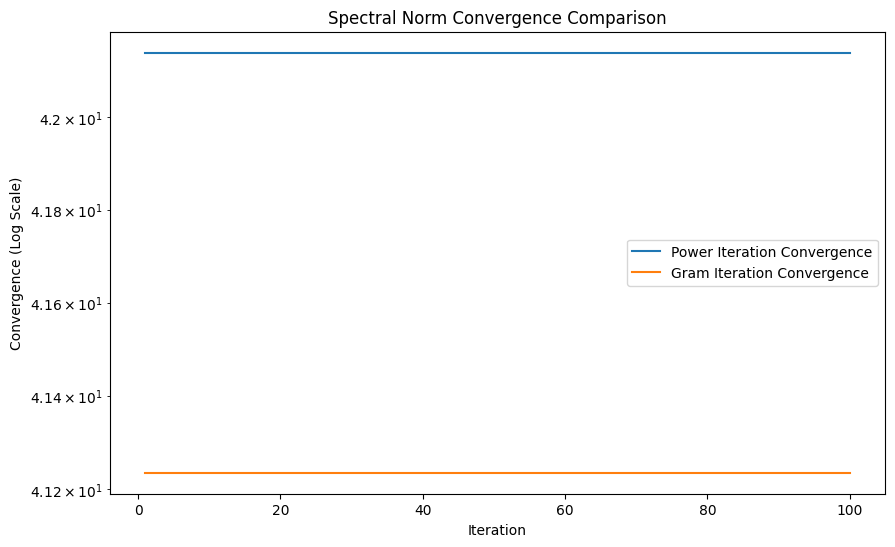


Comparison:
SVD Method - Time: 0.009930133819580078
Power Iteration - Time: 0.03860592842102051
Gram Iteration - Time: 0.012134075164794922


In [ ]:
# Load the matrix
def load_matrix(file_path):
    """
    Load the matrix from a given file path.
    """
    return np.loadtxt(file_path)

# Power Iteration Algorithm for Spectral Norm
def power_iteration(G, N_iter=2000):
    """
    Computes the spectral norm of G using the power iteration method.
    """
    u = np.random.rand(G.shape[1])  # Initialize u to match the number of columns in G
    for _ in range(N_iter):
        v = G @ u
        v_norm = np.linalg.norm(v)
        if v_norm == 0:
            raise ValueError("Norm of v became zero, stopping iteration.")
        v /= v_norm
        u = G.T @ v
        u /= np.linalg.norm(u)
    # Calculate the spectral norm as the norm of the resulting vector v
    sigma_1 = np.linalg.norm(G @ u)
    return sigma_1, u
# Gram Iteration Algorithm for Spectral Norm
# Gram Iteration Algorithm for Spectral Norm
# Gram Iteration Algorithm for Spectral Norm
# Gram Iteration Algorithm for Spectral Norm
def gram_iteration(G, N_iter=15):
    """
    Computes the spectral norm of G using the Gram iteration method.
    """
    m, n = G.shape
    if n > m:
        G = G.T  # Ensure G has more rows than columns if necessary

    for _ in range(N_iter):
        fro_norm = np.linalg.norm(G, 'fro')
        if fro_norm == 0:
            raise ValueError("Frobenius norm is zero, causing division by zero.")
        G /= fro_norm  # Rescale matrix to prevent overflow
        G = G.T @ G  # Perform Gram iteration

    # Compute the spectral norm by taking the Frobenius norm of the final matrix, and applying a scaling factor
    sigma_1 = np.linalg.norm(G, ord=2)**(1 / (2 ** N_iter))
    return sigma_1
# Convergence Analysis
def convergence_analysis(G, ref_norm, power_iters=2000, gram_iters=15, trials=100):
    """
    Compares the convergence of power iteration and gram iteration.
    """
    power_norms = []
    gram_norms = []
    for _ in range(trials):
        # Power iteration
        power_norm, _ = power_iteration(G, N_iter=power_iters)
        power_norms.append(power_norm)
        # Gram iteration
        gram_norm = gram_iteration(G, N_iter=gram_iters)
        gram_norms.append(gram_norm)
    return power_norms, gram_norms

# Plot Convergence Comparison
def plot_convergence(power_norms, gram_norms, ref_norm):
    """
    Plots the convergence of power and gram iterations.
    """
    iterations = np.arange(1, len(power_norms) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, np.abs(np.array(power_norms) - ref_norm), label="Power Iteration Convergence")
    plt.plot(iterations, np.abs(np.array(gram_norms) - ref_norm), label="Gram Iteration Convergence")
    plt.yscale('log')
    plt.xlabel("Iteration")
    plt.ylabel("Convergence (Log Scale)")
    plt.legend()
    plt.title("Spectral Norm Convergence Comparison")
    plt.show()

# Load the matrix
G = load_matrix('Data/matrix_057.txt')
print(type(G), G.shape)

# Reference Spectral Norm using SVD
start_time = time.time()
ref_norm = np.linalg.norm(G, 2)  # Using SVD as reference
ref_time = time.time() - start_time
print("Reference Spectral Norm (SVD):", ref_norm)
print("Execution Time (SVD):", ref_time)

# Power Iteration Method
start_time = time.time()
power_norm, _ = power_iteration(G)
power_time = time.time() - start_time
print("\nSpectral Norm (Power Iteration):", power_norm)
print("Execution Time (Power Iteration):", power_time)

# Gram Iteration Method
start_time = time.time()
gram_norm = gram_iteration(G)
gram_time = time.time() - start_time
print("\nSpectral Norm (Gram Iteration):", gram_norm)
print("Execution Time (Gram Iteration):", gram_time)

# Convergence Analysis
power_norms, gram_norms = convergence_analysis(G, ref_norm)
plot_convergence(power_norms, gram_norms, ref_norm)

# Average Execution Time Comparison
print("\nComparison:")
print("SVD Method - Time:", ref_time)
print("Power Iteration - Time:", power_time)
print("Gram Iteration - Time:", gram_time)
